In [1]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sys


In [2]:
sys.path.append("../module/")
import calcula_tanimoto
import lipinski

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
con = sqlite3.connect("../data/ligantes_odn.db")
df = pd.read_sql('select * from novos_ligantes', con)
df

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
0,COc1cc2[nH]c(N(C)C)nc(=NC3C=C4CCC3C4)c2cc1N=C(...,5.28,94.02,539.26,0.26,5,2,0.12,0.35
1,N#Cc1ccc(C(CN2CCCCCCC2=O)NCC2(NC(=O)c3ccc(Cl)c...,4.84,108.29,535.25,0.50,5,2,0.18,0.40
2,CSCCC(NC(=O)C1CCCCN1C(=O)COc1c(C2CCCCC2)ccc2cc...,4.97,95.94,526.25,0.45,5,2,0.01,0.36
3,CCc1cc(-c2ncc(C(=O)Nc3ccc(CC(=O)NC4CCCN(C(C)=O...,4.55,100.63,528.27,0.45,5,2,0.00,0.37
4,CC(C)=CC(=O)N1CCC(N2CC(CC#N)(n3ccc(-c4cc(C)c5[...,4.25,109.10,528.33,0.48,6,2,0.00,0.37
...,...,...,...,...,...,...,...,...,...
22501,CCCOc1ccc(C)cc1NC(=O)N1CCN(C(=O)c2c(C)cccc2O)C...,4.97,99.18,529.26,0.45,5,2,0.00,0.38
22502,CC(=O)c1cccc(NC(=O)NC(CC2CCCCC2)C(=O)N2CCC(=O)...,4.92,98.82,532.30,0.47,4,2,0.00,0.40
22503,CC(C)Oc1ccc(C(=O)N2CCC(C(=O)Nc3ccc(NC(=O)Cc4cc...,5.29,87.74,517.24,0.43,4,2,0.00,0.30
22504,CC(C)CC(=O)Nc1ccc2c(c1)C(=O)N(C(C)CO)CC(C)C(CN...,4.57,99.18,523.30,0.50,5,2,0.00,0.35


In [5]:
odn = ("CC(C)(F)C[C@H](N[C@@H](c1ccc(-c2ccc(S(C)(=O)=O)cc2)cc1)C(F)(F)F)C(=O)NC1(C#N)CC1")

In [6]:
df = df.apply(pd.to_numeric, errors='ignore')

In [7]:
df

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
0,COc1cc2[nH]c(N(C)C)nc(=NC3C=C4CCC3C4)c2cc1N=C(...,5.28,94.02,539.26,0.26,5,2,0.12,0.35
1,N#Cc1ccc(C(CN2CCCCCCC2=O)NCC2(NC(=O)c3ccc(Cl)c...,4.84,108.29,535.25,0.50,5,2,0.18,0.40
2,CSCCC(NC(=O)C1CCCCN1C(=O)COc1c(C2CCCCC2)ccc2cc...,4.97,95.94,526.25,0.45,5,2,0.01,0.36
3,CCc1cc(-c2ncc(C(=O)Nc3ccc(CC(=O)NC4CCCN(C(C)=O...,4.55,100.63,528.27,0.45,5,2,0.00,0.37
4,CC(C)=CC(=O)N1CCC(N2CC(CC#N)(n3ccc(-c4cc(C)c5[...,4.25,109.10,528.33,0.48,6,2,0.00,0.37
...,...,...,...,...,...,...,...,...,...
22501,CCCOc1ccc(C)cc1NC(=O)N1CCN(C(=O)c2c(C)cccc2O)C...,4.97,99.18,529.26,0.45,5,2,0.00,0.38
22502,CC(=O)c1cccc(NC(=O)NC(CC2CCCCC2)C(=O)N2CCC(=O)...,4.92,98.82,532.30,0.47,4,2,0.00,0.40
22503,CC(C)Oc1ccc(C(=O)N2CCC(C(=O)Nc3ccc(NC(=O)Cc4cc...,5.29,87.74,517.24,0.43,4,2,0.00,0.30
22504,CC(C)CC(=O)Nc1ccc2c(c1)C(=O)N(C(C)CO)CC(C)C(CN...,4.57,99.18,523.30,0.50,5,2,0.00,0.35


In [8]:
df.loc[(df.Smiles.str.contains('#')) & (df.i_tanimoto > 0.4) & (df.active_probability >= 0.1)].sort_values(by='active_probability', ascending=False)

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto
1199,COC(=O)NC(Cc1ccccc1)C(Cc1ccc(Cl)cc1)NC(CC(C)C)...,4.74,94.46,524.26,0.44,5,2,0.31,0.42
20670,COc1cccc2c1Cc1ccccc1CC2C(=O)NC(Cc1ccccc1)C(=O)...,3.84,100.45,523.25,0.47,5,2,0.30,0.41
5542,CCC1CCN(C(=O)C(CCCC2CCNCC2)NC(=O)c2cc(-c3cccc(...,4.42,102.30,518.27,0.51,5,2,0.21,0.44
11649,C#Cc1c(C(=O)NCC(=O)N2CC3CCC2C3)ccc(OC)c1-c1[nH...,4.48,100.21,525.27,0.46,5,2,0.16,0.41
20109,N#Cc1ccc(-c2ccc(C34CC(C(O)Cc5ccccc53)N4C(=O)NC...,4.26,102.66,525.21,0.37,5,2,0.16,0.42
16886,N#CC1(NC(=O)C2CCCN2Cc2ccc(-c3c[nH]c(=NC(=O)CC4...,4.50,101.35,525.22,0.45,5,2,0.14,0.49
6900,N#Cc1cccc(-c2c(-c3cc(F)cc(C#CCO)c3)cc(F)c(C3(C...,4.85,91.63,523.13,0.38,5,2,0.14,0.41
15524,CC1C(Cc2ccc3c(c2)COC3=O)C(NC(=O)c2cc(-c3cccc(C...,4.20,102.66,529.18,0.44,6,2,0.14,0.42
17865,CC(C)CC(NC(=O)c1ccc2c(C#N)nc(CCCN3CCCCC3)cc2c1...,4.97,98.12,517.34,0.46,5,2,0.13,0.44
20271,CC(=O)N=c1[nH]c2ccccc2n1C1CCN(CC(=O)NC2(c3ccc(...,4.64,118.31,561.29,0.32,6,3,0.11,0.42


In [9]:
df.Smiles.iloc[0]

'COc1cc2[nH]c(N(C)C)nc(=NC3C=C4CCC3C4)c2cc1N=C(N=c1cc[nH]c(C(F)(F)F)c1)C(C)C'

In [10]:
pass_lin = lipinski.lipinski_pass_dataframe(df)

RDKit ERROR: [14:33:46] Explicit valence for atom # 4 N, 5, is greater than permitted
[14:33:46] Explicit valence for atom # 4 N, 5, is greater than permitted


In [11]:
df["ro_5"] = pass_lin

In [12]:
df.loc[(df.Smiles.str.contains('#')) & (df.i_tanimoto > 0.3) & (df.ro_5 == 1)].sort_values(by='active_probability', ascending=False)

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto,ro_5
18655,N#CCC1(NC(=O)c2[nH]cc3c2C(F)(F)c2nc(-c4ccc(C(F...,3.40,99.39,494.09,0.43,5,2,0.02,0.39,True


In [13]:
len(df.loc[(df.Smiles.str.contains('#'))])

1748

In [14]:
df.loc[df.ro_5 == 1]

,Smiles,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto,ro_5
18655,N#CCC1(NC(=O)c2[nH]cc3c2C(F)(F)c2nc(-c4ccc(C(F...,3.40,99.39,494.09,0.43,5,2,0.02,0.39,True


In [15]:
df.loc[10658, "ro_5"] = False

In [17]:
clust_novos_ligs = df.drop(['Smiles'], axis=1)
clust_novos_ligs

,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto,ro_5
0,5.28,94.02,539.26,0.26,5,2,0.12,0.35,False
1,4.84,108.29,535.25,0.50,5,2,0.18,0.40,False
2,4.97,95.94,526.25,0.45,5,2,0.01,0.36,False
3,4.55,100.63,528.27,0.45,5,2,0.00,0.37,False
4,4.25,109.10,528.33,0.48,6,2,0.00,0.37,False
...,...,...,...,...,...,...,...,...,...
22501,4.97,99.18,529.26,0.45,5,2,0.00,0.38,False
22502,4.92,98.82,532.30,0.47,4,2,0.00,0.40,False
22503,5.29,87.74,517.24,0.43,4,2,0.00,0.30,False
22504,4.57,99.18,523.30,0.50,5,2,0.00,0.35,False


In [18]:
from rdkit.Chem import Descriptors, rdMolDescriptors, AllChem, QED, MolFromSmiles
def get_descriptors(smiles):
    dicio = {}
    target_names = ["Smiles", "logp", "tpsa", "molwt", "qed", "hba", "hbd", "active_probability"]
    mol = MolFromSmiles(smiles)
    dicio["Smiles"] = smiles
    dicio["logp"] = Descriptors.MolLogP(mol)
    dicio["tpsa"] = Descriptors.TPSA(mol)
    dicio["molwt"] = Descriptors.ExactMolWt(mol)
    dicio["hba"] = rdMolDescriptors.CalcNumHBA(mol)
    dicio["hbd"] = rdMolDescriptors.CalcNumHBD(mol)
    dicio["qed"] = QED.qed(mol)
    
    return dicio

In [19]:
target = get_descriptors(odn)

In [20]:
clust_novos_ligs = df.drop(['Smiles'], axis=1)
clust_novos_ligs

,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto,ro_5
0,5.28,94.02,539.26,0.26,5,2,0.12,0.35,False
1,4.84,108.29,535.25,0.50,5,2,0.18,0.40,False
2,4.97,95.94,526.25,0.45,5,2,0.01,0.36,False
3,4.55,100.63,528.27,0.45,5,2,0.00,0.37,False
4,4.25,109.10,528.33,0.48,6,2,0.00,0.37,False
...,...,...,...,...,...,...,...,...,...
22501,4.97,99.18,529.26,0.45,5,2,0.00,0.38,False
22502,4.92,98.82,532.30,0.47,4,2,0.00,0.40,False
22503,5.29,87.74,517.24,0.43,4,2,0.00,0.30,False
22504,4.57,99.18,523.30,0.50,5,2,0.00,0.35,False


In [21]:
clust_novos_ligs

,logp,tpsa,molwt,qed,hba,hbd,active_probability,i_tanimoto,ro_5
0,5.28,94.02,539.26,0.26,5,2,0.12,0.35,False
1,4.84,108.29,535.25,0.50,5,2,0.18,0.40,False
2,4.97,95.94,526.25,0.45,5,2,0.01,0.36,False
3,4.55,100.63,528.27,0.45,5,2,0.00,0.37,False
4,4.25,109.10,528.33,0.48,6,2,0.00,0.37,False
...,...,...,...,...,...,...,...,...,...
22501,4.97,99.18,529.26,0.45,5,2,0.00,0.38,False
22502,4.92,98.82,532.30,0.47,4,2,0.00,0.40,False
22503,5.29,87.74,517.24,0.43,4,2,0.00,0.30,False
22504,4.57,99.18,523.30,0.50,5,2,0.00,0.35,False


In [22]:
normalize_clus_novos_ligs = preprocessing.normalize(clust_novos_ligs, norm='l1')
cluster_novos_ligs_knn = KMeans(n_clusters=7, random_state=15)
grupos_novos_ligs = cluster_novos_ligs_knn.fit(normalize_clus_novos_ligs).labels_

In [23]:
df['knn'] = grupos_novos_ligs

In [24]:
colors = {0:'tan', 1:'springgreen', 2:'blue', 3:'yellow', 4:"red", 5:"royalblue", 6:"m", 7:"black"}

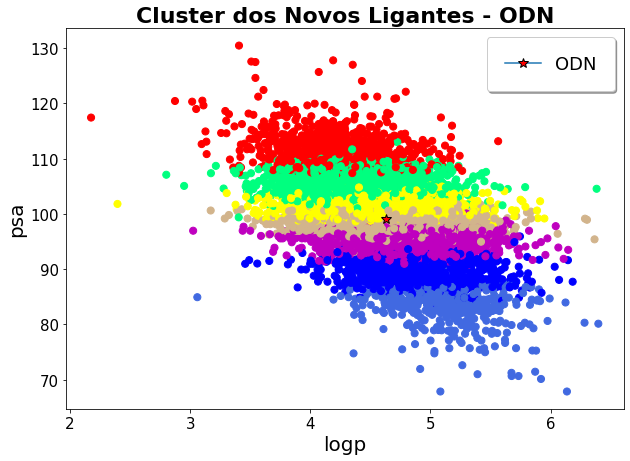

In [25]:
figura = plt.figure(figsize=(10,7))
plt.scatter(x=df.logp, y=df.tpsa, c=df.knn.map(colors), s=50)
plt.title("Cluster dos Novos Ligantes - ODN", fontsize=22, weight="bold")
alvo_mark = plt.plot(target['logp'], target['tpsa'], marker="*", markersize=10, markeredgecolor="black", markerfacecolor="red", label="ODN")
plt.xlabel('logp', fontsize=20)
plt.ylabel('psa', fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(handles=alvo_mark, fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=18)
plt.show()

In [30]:
figura.savefig("imagens/odn_cluster")

In [27]:
busca_cluster = df.query("knn == 0")

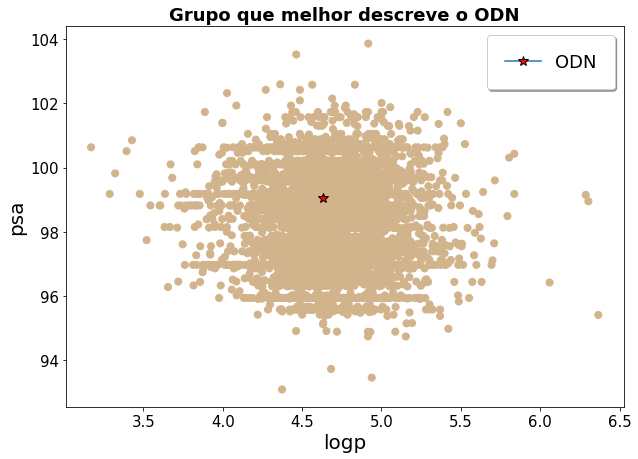

In [29]:
figura_2 = plt.figure(figsize=(10,7))
plt.scatter(x=busca_cluster.logp, y=busca_cluster.tpsa, c=busca_cluster.knn.map(colors), s=50)
plt.title("Grupo que melhor descreve o ODN", fontsize=18, weight="bold")
alvo_mark = plt.plot(target['logp'], target['tpsa'], marker="*", markersize=10, markeredgecolor="black", markerfacecolor="red", label="ODN")
plt.xlabel('logp', fontsize=20)
plt.ylabel('psa', fontsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(handles=alvo_mark, fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=18)
plt.show()

In [31]:
figura_2.savefig("imagens/odn_cluster_descript")

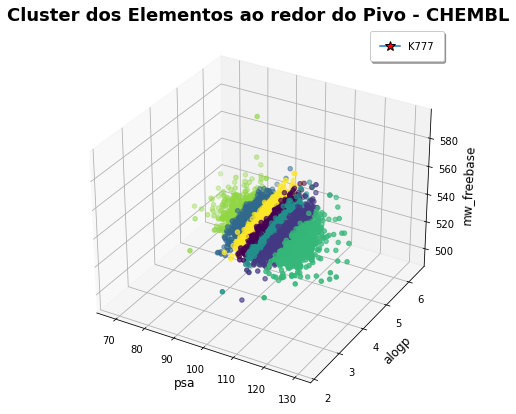

In [57]:
plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
plt.title("Cluster dos Elementos ao redor do Pivo - CHEMBL", fontsize=18, weight="bold")
plt.xlabel("psa", fontsize=12)
plt.ylabel("alogp", fontsize=12)
ax.set_zlabel('mw_freebase', fontsize=12)
plt.legend(handles=alvo_mark, fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=10)
ax.scatter3D(df.tpsa, df.logp, df.molwt, c=grupos_novos_ligs);
plt.plot(target["tpsa"], target["logp"], target['molwt'], marker="*", markersize=15, markeredgecolor="red", markerfacecolor="red", label="Pivo")
plt.show()

In [ ]:
adsaaawww